<h1><center>Uncapacited Facility Location Project</center></h1>
<h3><center>Authors: A.F.M. Sanjan Rahman and Davide Savini</center></h3>
<h4><center>20/05/2023</center></h4>

## Objective

Facility location problems can be commonly found in many industries, including logistics and telecommunications. We’ll show how to manage an uncapacited facility location (UFL) problem building a model and exploiting it in different examples. We’ll demonstrate how to construct a mixed-integer programming (MIP) model of this problem, implement this model in the Gurobi Python API, and then use the Gurobi Optimizer to find an optimal solution. The used environment is <code>Anaconda-Jupyter Notebook</code> and on that the used language is <code>Python</code>.

## Solution Approach

Mathematical programming is a declarative approach where the modeler formulates a mathematical optimization model that captures the key aspects of a complex business problem. The Gurobi Optimizer solves such models using state-of-the-art mathematics and computer science.

A mathematical optimization model has five components, namely:

* Sets and indices.
* Parameters.
* Decision variables.
* Objective function(s).
* Constraints.

We now present a MIP formulation for the uncapacited facility location (UFL) problem.

## Model Formulation

### Sets and Indices

$u \in S$: Index and set of facility (supplier) locations $\{1,2,..,n\}$.

$v \in D$: Index and set of demand (or customer/user) locations $\{1,2,..,m\}$.

### Parameters

$f_{u} \in \mathbb{R}^+$: Fixed cost associated with constructing facility $u \in S$.

$d_{u,v} \in \mathbb{R}^+$: Distance between facility $u \in S$ and customer $v \in D$.

$c_{u,v} \in \mathbb{R}^+$: Cost of shipping between candidate facility site $u \in S$ and customer location $v \in D$. We assume that this cost is proportional to the distance between the facility and the customer. That is, $c_{u,v} = \alpha \cdot d_{u,v}$, where $\alpha$ is the cost per km of driving, adjusted to incorporate the average number of trips needed to reach any facility-customer distance.

### Decision Variables
 
$x_u \in\{0,1\} \quad \forall u \in S \quad x_u=1 \Leftrightarrow$ facility $u$ is active.

Also it's good to define:

$y_{u v} \in\{0,1\} \quad \forall u \in S, \quad \forall v \in D, \quad y_{u v}=1 \Leftrightarrow$ client $v$ is served by facility $u$.

### Objective Function

**Total costs**. We want to find the optimal number and location of facilities to reduce costs and meet demand. This is the sum of the cost of opening facilities and the cost related to shipping between facilities and users/customers. In this case, it is always optimal to satisfy all of the demand from customer $v$ from the nearest open (active) facility $u$.

$\begin{equation} \min \sum_{u \in S} f_u x_u+\sum_{u \in S} \sum_{v \in D} c_{u v} y_{u v}\tag{1}\end{equation}$

where 
- total setup cost (facility cost): $\sum_{u \in S} f_u x_u$;
- total allocation cost (connection cost): $\sum_{u \in S} \sum_{v \in D} c_{u v} y_{u v}$.


### Demand satisfaction constraints 
Each client is served from one facility:

$\begin{equation} \quad \sum_{u \in S} y_{u \bar{v}}=1 \quad \forall \bar{v} \in D \tag{2}\end{equation}$.

## "strong" formulation $(n \cdot m)$ consistancy constraints:  
Cardinality: $|S|=n$, $|D|=m$.
 
$\begin{equation} x_u \geqslant y_{u v} \quad \forall u \in S, v \in D \tag{3}\end{equation}$

- Pros: Better and faster estimation;
- Cons: You need to know a-priori $n \cdot m$ constraints.

## alternatively "weak" formulation $(n)$ consistancy constraints: 
Cardinality: $|S|=n$, $|D|=m$.

$\begin{equation} m\cdot x_u \geqslant \sum_{v \in D} y_{u \bar{v}} \quad \forall u \in S \tag{4}\end{equation}$

- Pros: You need to know a-priori $n$ constraints, so less than strong one;
- Cons: The estimation requires more time than the strong formulation. 


## Python Implementation - Build and Execution of the two models in four different examples

### Preliminary steps

Let us import the Gurobi Python Module and other Python libraries:

- <code>NumPy</code>, for data manipulation;
- <code>random</code>, for randomize and create some datas;
- <code>Matplotlib</code>, for data visualization;
- <code>Gurobi</code>, for optimization.

Then, we initialize the data structures with four different examples: 
- the first with a general random facility and demand example;
- the other three with given different datas/instances.

### Model Deployment

We now determine the MIP model for the uncapacited facility location problem, by defining the decision variables, constraints, and objective function. Next, we start the optimization process and Gurobi finds the plan to build facilities that minimizes total costs. The final step is to show the found results in plots that can be seen as maps of different demand clusters served with respect to their best facility. 

# Uncapacited Facility Location - General Example (Example 1)

For the preliminary step, in this case we create a general amount of instances. We have:
- 100 facilities;
- 1000 demands (users);
- randomic annual cost.

We create two script, one with strong formulation model and one with weak formulation model using same instances for both.

## UFL: STRONG FORMULATION MODEL


############################### STRONG FORMULATION CASE ###############################

Number of Facilities:  100

Number of Demands (Users):  1000


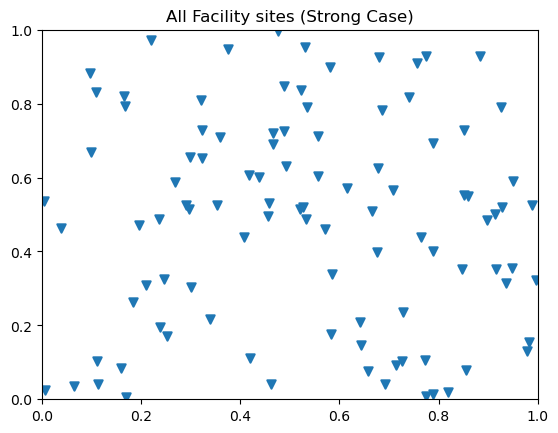

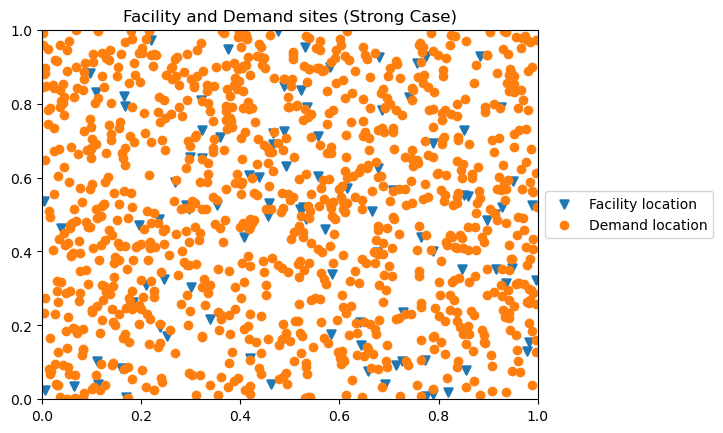


########################## STRONG FORMULATION MODEL ##########################

Set parameter Method to value 3
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 101000 rows, 100100 columns and 300000 nonzeros
Model fingerprint: 0x56b854c3
Variable types: 100000 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-03, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3698.0446818
Presolve time: 0.43s
Presolved: 101000 rows, 100100 columns, 300000 nonzeros
Variable types: 100000 continuous, 100 integer (100 binary)
Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.09s

Barrier statistics:
 Dense cols : 100
 

In [17]:
import random 
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB

# ########################## STRONG FORMULATION CODE ##########################
print("\n############################### STRONG FORMULATION CASE ###############################")

facility = list(range(100))  
demand = list(range(1000))

print("\nNumber of Facilities: ", len(facility))
print("\nNumber of Demands (Users): ", len(demand))

# print(facility)
# print(demand)

# facility annual cost
fac_cost_annual = [ 20 + 20 * random.random() for i in facility]
# print(type(fac_cost_annual))

# pick up facility location randomly
fact_x = [ random.random() for i in facility ]
fact_y = [ random.random() for i in facility ]

# facility location plot
plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(fact_x, fact_y, marker="v", linewidth=1.5)
plt.title('All Facility sites (Strong Case)')

# pick up demand location randomly
dem_x = [ random.random() for i in demand ]
dem_y = [ random.random() for i in demand ]

# all facility and demand location plot
plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(fact_x, fact_y, marker="v", linewidth=1.5, label="Facility location")
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(dem_x, dem_y, label="Demand location")
plt.title('Facility and Demand sites (Strong Case)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# create model
m = gp.Model()
# create variables, x[i,j]
x = m.addVars( facility, demand)
# create variables, y[i]
y = m.addVars( facility, vtype=GRB.BINARY )

# Suppose that cost equals rectilinear distance
def rect_dist(x1,y1,x2,y2):
    return abs(x1-x2) + abs(y1-y2)

cost = { (i,j) : rect_dist( fact_x[i], fact_y[i], dem_x[j], dem_y[j] ) for i in facility for j in demand }
# print(type(cost))

# objective minimize transportation cost + annual implementation cost 
m.setObjective( gp.quicksum( cost[i,j] * x[i,j] for i in facility for j in demand)
                            + gp.quicksum( fac_cost_annual[i] * y[i] for i in facility), GRB.MINIMIZE)

# constraints - each demand point should be fullfilled by assigned facility 
m.addConstrs( gp.quicksum( x[i,j] for i in facility) == 1 for j in demand)
# comstraints - if no facility is bulit then there is no demand 
# strong formulation -
print("\n########################## STRONG FORMULATION MODEL ##########################\n")

m.addConstrs( x[i,j] <= y[i] for i in facility for j in demand )

m.update()

# force Gurobi to use concurrent method (primal simplex, dual simplex, barrier all at the same time!)
m.Params.Method = 3

# solve
m.optimize()

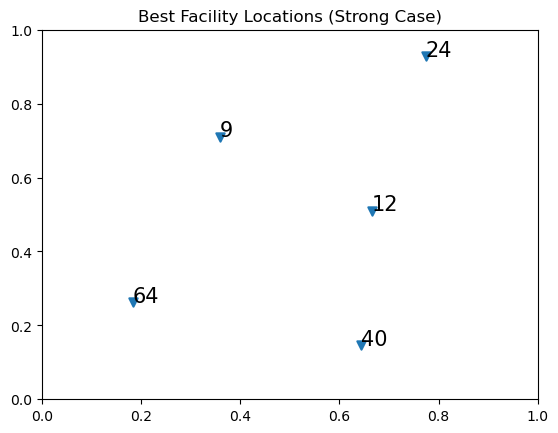

In [18]:
medians = [ i for i in facility if y[i].x > 0.5 ]
medians_x = [ fact_x[i] for i in medians ]
medians_y = [ fact_y[i] for i in medians ]

plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(medians_x, medians_y, marker="v", linewidth=1.5)
for i, txt in enumerate(medians):
    plt.annotate(txt, (medians_x[i], medians_y[i]), color = "k", fontsize=15)
plt.title('Best Facility Locations (Strong Case)')
plt.show()


Number of points assigned to facility 9 is 263

Demands which are associated with facility  9 is --
 [3, 9, 13, 16, 18, 21, 29, 31, 32, 33, 37, 41, 53, 54, 58, 59, 60, 63, 66, 69, 70, 72, 75, 86, 88, 90, 93, 94, 98, 109, 111, 112, 113, 115, 121, 122, 124, 126, 133, 140, 142, 147, 148, 151, 152, 153, 156, 157, 166, 167, 171, 176, 180, 187, 188, 190, 199, 204, 208, 210, 215, 216, 222, 224, 225, 227, 234, 237, 240, 242, 257, 261, 266, 271, 273, 277, 280, 282, 283, 285, 287, 288, 291, 298, 299, 302, 306, 310, 313, 320, 321, 328, 329, 333, 334, 344, 346, 348, 349, 350, 356, 358, 361, 362, 375, 379, 382, 388, 389, 390, 392, 399, 400, 402, 406, 407, 412, 420, 429, 432, 442, 446, 452, 455, 458, 469, 472, 476, 478, 479, 480, 489, 499, 503, 514, 516, 519, 525, 528, 532, 535, 536, 538, 539, 544, 545, 548, 549, 551, 560, 567, 569, 580, 591, 592, 593, 595, 597, 598, 599, 605, 611, 620, 621, 624, 632, 634, 642, 646, 648, 649, 653, 657, 658, 661, 663, 665, 670, 674, 677, 685, 687, 689, 691, 696, 701

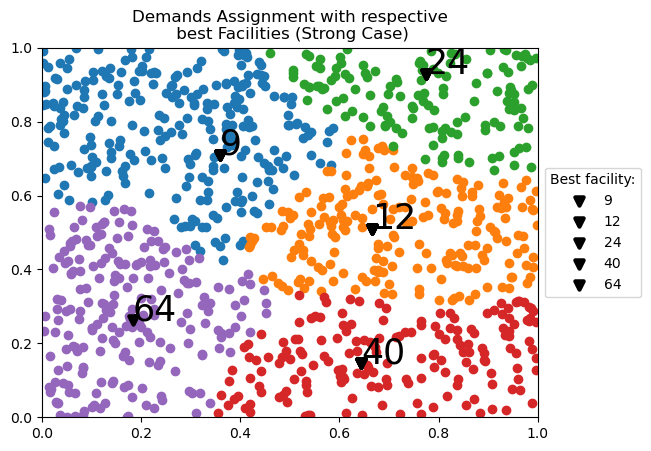

In [19]:
# Draw the facility assignments
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Demands Assignment with respective\n best Facilities (Strong Case)')

# print(x[0,0])
# all_vars = x.getVars()
# values = x.getAttr("X", all_vars)

k = len(medians)
for p in range(k):
    i = medians[p]
    assigned = [ j for j in demand if x[i,j].x > 0.5 ]
    assigned_x = [ dem_x[j] for j in assigned ]
    assigned_y = [ dem_y[j] for j in assigned ]
    plt.scatter(assigned_x, assigned_y)
    plt.scatter(medians_x, medians_y, c="k", marker="v", label=medians[p], linewidth=3)
    print("\nNumber of points assigned to facility",i,"is",len(assigned))
    print("\nDemands which are associated with facility ",i,"is --\n",assigned)
    print("\n * * * \n")

    
#     plt.plot(assigned_x,assigned_y)
for i, txt in enumerate(medians):
    plt.annotate(txt, (medians_x[i], medians_y[i]), color = "k", fontsize=25)
        
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Best facility:")
plt.show()


## UFL: WEAK FORMULATION MODEL


############################### WEAK FORMULATION CASE ###############################


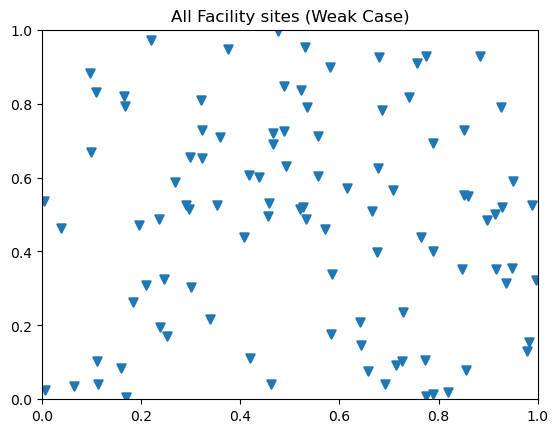

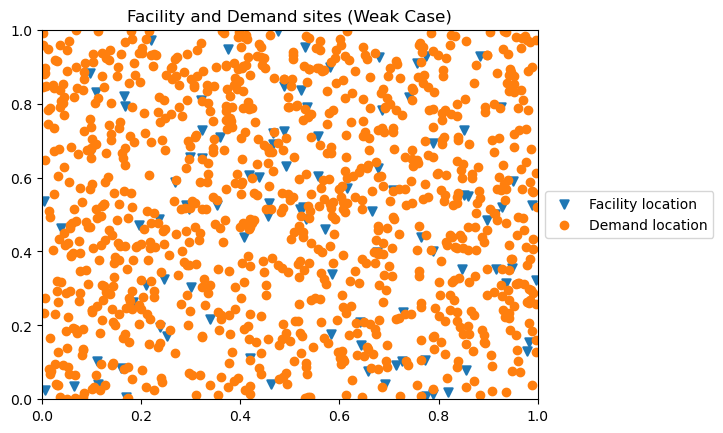


########################## WEAK FORMULATION MODEL ##########################

Set parameter Method to value 3
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 1100 rows, 100100 columns and 200100 nonzeros
Model fingerprint: 0xecf7f802
Variable types: 100000 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [3e-03, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3698.0446818
Presolve time: 0.33s
Presolved: 1100 rows, 100100 columns, 200100 nonzeros
Variable types: 100000 continuous, 100 integer (100 binary)

Root relaxation: objective 9.450082e+01, 0 iterations, 0.14 seconds (0.11 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl 

In [20]:
# ########################## WEAK FORMULATION CODE ##########################
print("\n############################### WEAK FORMULATION CASE ###############################")
# facility location plot
plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(fact_x, fact_y, marker="v", linewidth=1.5)
plt.title('All Facility sites (Weak Case)')

# all facility and demand location plot
plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(fact_x, fact_y, marker="v", linewidth=1.5, label="Facility location")
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(dem_x, dem_y, label="Demand location")
plt.title('Facility and Demand sites (Weak Case)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# create model
m = gp.Model()
# create variables, x[i,j]
x = m.addVars( facility, demand)
# create variables, y[i]
y = m.addVars( facility, vtype=GRB.BINARY )

# Suppose that cost equals rectilinear distance
def rect_dist(x1,y1,x2,y2):
    return abs(x1-x2) + abs(y1-y2)

cost = { (i,j) : rect_dist( fact_x[i], fact_y[i], dem_x[j], dem_y[j] ) for i in facility for j in demand }
# print(type(cost))

# objective minimize transportation cost + annual implementation cost 
m.setObjective( gp.quicksum( cost[i,j] * x[i,j] for i in facility for j in demand)
                            + gp.quicksum( fac_cost_annual[i] * y[i] for i in facility), GRB.MINIMIZE)

# constraints - each demand point should be fullfilled by assigned facility 
m.addConstrs( gp.quicksum( x[i,j] for i in facility) == 1 for j in demand)
# comstraints - if no facility is bulit then there is no demand 

# weak formulation -
print("\n########################## WEAK FORMULATION MODEL ##########################\n")
# ###
# From notes of this year:
# n is the cardinality of client so the cardinality of set |D|
# m is the cardinality of set of location of facilities |S|
# notation code
# from notes to code: y_uv -> x[i,j] and x_u -> y[i] || u -> i facilities and v -> j demands
# ###

n = len(demand)
m.addConstrs(gp.quicksum(x[i,j] for j in demand) <= n*y[i] for i in facility)

# m.addConstrs( x[i,j] <= n*y[i] for i in facility for j in demand )
# m.addConstrs( sum(x[0,0].values()) <= n*y[0])

m.update()

# force Gurobi to use concurrent method (primal simplex, dual simplex, barrier all at the same time!)
m.Params.Method = 3

# solve
m.optimize()


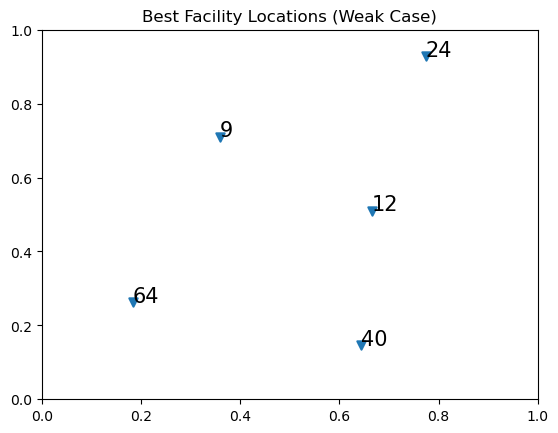

In [21]:
medians = [ i for i in facility if y[i].x > 0.5 ]
medians_x = [ fact_x[i] for i in medians ]
medians_y = [ fact_y[i] for i in medians ]

plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(medians_x, medians_y, marker="v", linewidth=1.5)
for i, txt in enumerate(medians):
    plt.annotate(txt, (medians_x[i], medians_y[i]), color = "k", fontsize=15)
plt.title('Best Facility Locations (Weak Case)')
plt.show()


Number of points assigned to facility 9 is 263

Demands which are associated with facility  9 is --
 [3, 9, 13, 16, 18, 21, 29, 31, 32, 33, 37, 41, 53, 54, 58, 59, 60, 63, 66, 69, 70, 72, 75, 86, 88, 90, 93, 94, 98, 109, 111, 112, 113, 115, 121, 122, 124, 126, 133, 140, 142, 147, 148, 151, 152, 153, 156, 157, 166, 167, 171, 176, 180, 187, 188, 190, 199, 204, 208, 210, 215, 216, 222, 224, 225, 227, 234, 237, 240, 242, 257, 261, 266, 271, 273, 277, 280, 282, 283, 285, 287, 288, 291, 298, 299, 302, 306, 310, 313, 320, 321, 328, 329, 333, 334, 344, 346, 348, 349, 350, 356, 358, 361, 362, 375, 379, 382, 388, 389, 390, 392, 399, 400, 402, 406, 407, 412, 420, 429, 432, 442, 446, 452, 455, 458, 469, 472, 476, 478, 479, 480, 489, 499, 503, 514, 516, 519, 525, 528, 532, 535, 536, 538, 539, 544, 545, 548, 549, 551, 560, 567, 569, 580, 591, 592, 593, 595, 597, 598, 599, 605, 611, 620, 621, 624, 632, 634, 642, 646, 648, 649, 653, 657, 658, 661, 663, 665, 670, 674, 677, 685, 687, 689, 691, 696, 701

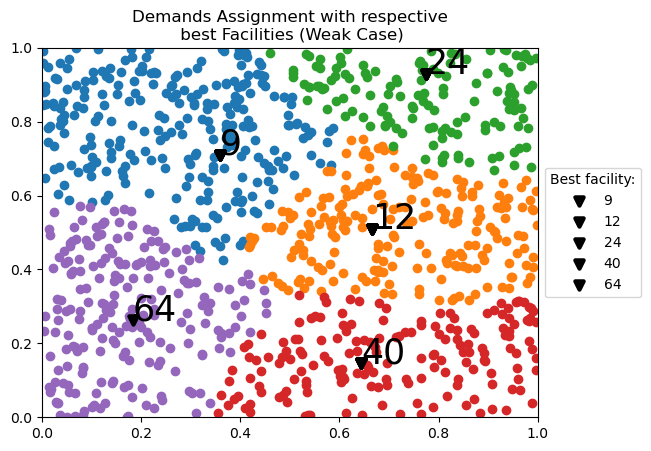

In [22]:
# Draw the facility assignments
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Demands Assignment with respective\n best Facilities (Weak Case)')

# print(x[0,0])
# all_vars = x.getVars()
# values = x.getAttr("X", all_vars)

k = len(medians)
for p in range(k):
    i = medians[p]
    assigned = [ j for j in demand if x[i,j].x > 0.5 ]
    assigned_x = [ dem_x[j] for j in assigned ]
    assigned_y = [ dem_y[j] for j in assigned ]
    plt.scatter(assigned_x, assigned_y)
    plt.scatter(medians_x, medians_y, c="k", marker="v", label=medians[p], linewidth=3)
    print("\nNumber of points assigned to facility",i,"is",len(assigned))
    print("\nDemands which are associated with facility ",i,"is --\n",assigned)
#     print("* * *".center(120))    
    print("\n * * * \n")

    
#     plt.plot(assigned_x,assigned_y)
for i, txt in enumerate(medians):
    plt.annotate(txt, (medians_x[i], medians_y[i]), color = "k", fontsize=25)
        
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Best facility:")
plt.show()


# Uncapacited Facility Location - Given Instances (Example 2)

For the preliminary step, in this case we have given instances. We extract facilities, demands, the opening cost of each facilities and determine connection cost between demands based on their distances from **334ChessS.txt** file.

In this case, to reduce code redundancy we create one single script with both models (strong and weak) using same instances.

## UFL: STRONG AND WEAK FORMULATION MODEL SCRIPT


########################## Instances Loading ##########################

Values 1st row of allData - Name of Instances file:  FILE: 334ChessS.txt

Number of Facilities:  144

Number of Demands (Users):  144

############### Facilities: ###############

  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143]

############### Demands: ###############

  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 2

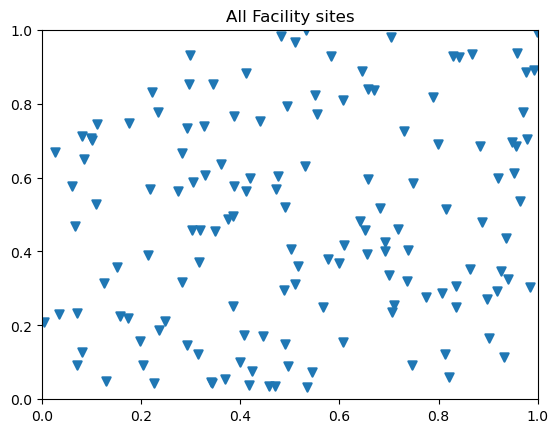

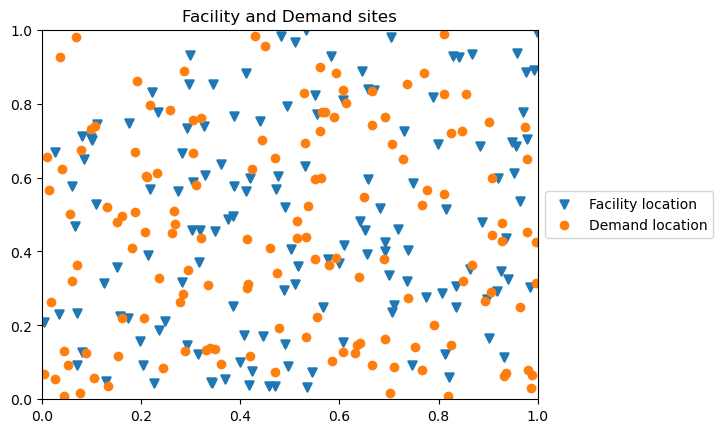


########################## STRONG FORMULATION MODEL ##########################

Set parameter Method to value 3
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 20880 rows, 20880 columns and 62208 nonzeros
Model fingerprint: 0x5511fc16
Variable types: 20736 continuous, 144 integer (144 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 6e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 537009.57800
Presolve time: 0.09s
Presolved: 20880 rows, 20880 columns, 62208 nonzeros
Variable types: 20736 continuous, 144 integer (144 binary)
Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.04s

Barrier performed 0 iterations in 0.24 seconds 

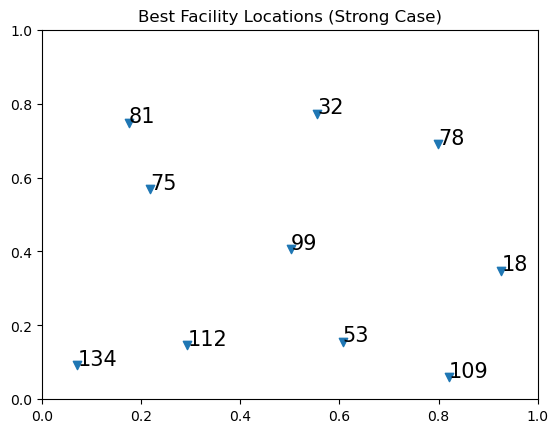


Number of points assigned to facility 18 is 11

Demands which are associated with facility  18 is --
 [13, 24, 32, 38, 40, 47, 50, 52, 69, 127, 142]

 * * * 


Number of points assigned to facility 32 is 19

Demands which are associated with facility  32 is --
 [0, 7, 9, 18, 30, 37, 43, 45, 56, 66, 76, 78, 81, 85, 101, 111, 120, 125, 139]

 * * * 


Number of points assigned to facility 53 is 13

Demands which are associated with facility  53 is --
 [27, 33, 36, 42, 53, 62, 67, 75, 100, 112, 126, 131, 132]

 * * * 


Number of points assigned to facility 75 is 18

Demands which are associated with facility  75 is --
 [5, 10, 15, 19, 25, 28, 31, 41, 46, 48, 60, 80, 86, 90, 93, 94, 102, 130]

 * * * 


Number of points assigned to facility 78 is 16

Demands which are associated with facility  78 is --
 [22, 26, 51, 61, 72, 77, 87, 106, 108, 113, 117, 121, 123, 135, 136, 137]

 * * * 


Number of points assigned to facility 81 is 13

Demands which are associated with facility  81 is --
 

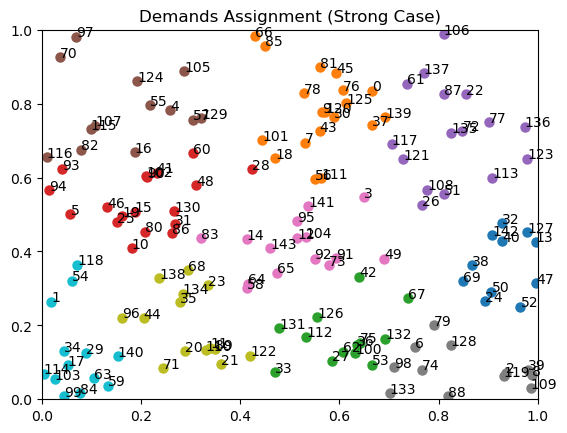

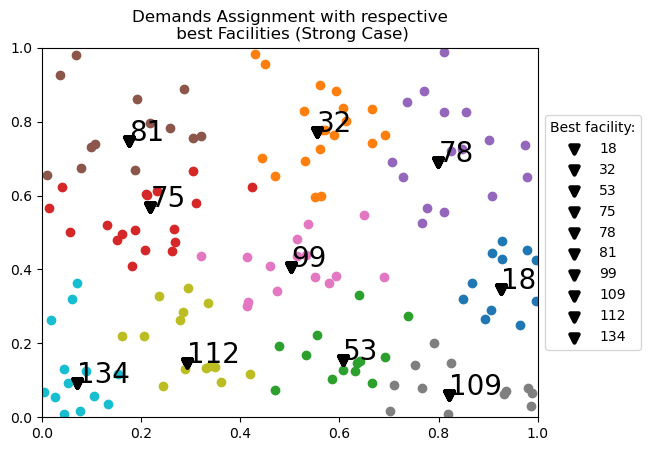


########################## WEAK FORMULATION MODEL ##########################

Set parameter Method to value 3
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 288 rows, 20880 columns and 41616 nonzeros
Model fingerprint: 0xbdfeef4d
Variable types: 20736 continuous, 144 integer (144 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [2e+01, 6e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 537009.57800
Presolve time: 0.09s
Presolved: 288 rows, 20880 columns, 41616 nonzeros
Variable types: 20736 continuous, 144 integer (144 binary)

Root relaxation: objective 2.616254e+04, 0 iterations, 0.06 seconds (0.02 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |

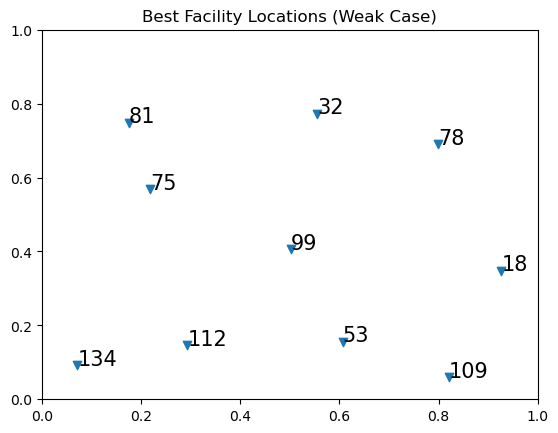


Number of points assigned to facility 18 is 11

Demands which are associated with facility  18 is --
 [13, 24, 32, 38, 40, 47, 50, 52, 69, 127, 142]

 * * * 


Number of points assigned to facility 32 is 19

Demands which are associated with facility  32 is --
 [0, 7, 9, 18, 30, 37, 43, 45, 56, 66, 76, 78, 81, 85, 101, 111, 120, 125, 139]

 * * * 


Number of points assigned to facility 53 is 13

Demands which are associated with facility  53 is --
 [27, 33, 36, 42, 53, 62, 67, 75, 100, 112, 126, 131, 132]

 * * * 


Number of points assigned to facility 75 is 18

Demands which are associated with facility  75 is --
 [5, 10, 15, 19, 25, 28, 31, 41, 46, 48, 60, 80, 86, 90, 93, 94, 102, 130]

 * * * 


Number of points assigned to facility 78 is 16

Demands which are associated with facility  78 is --
 [22, 26, 51, 61, 72, 77, 87, 106, 108, 113, 117, 121, 123, 135, 136, 137]

 * * * 


Number of points assigned to facility 81 is 13

Demands which are associated with facility  81 is --
 

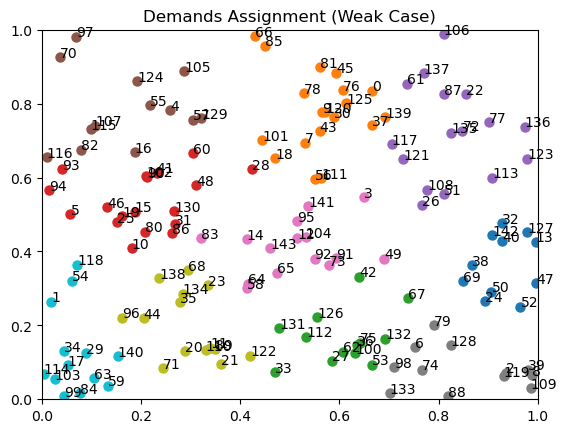

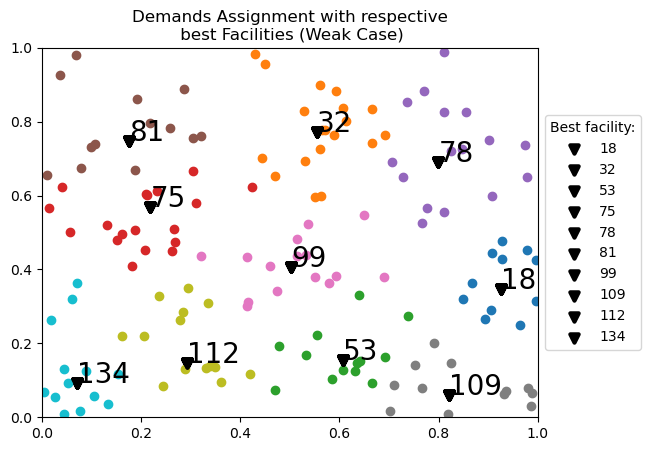

In [23]:
import random 
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB
import numpy as np

print("\n########################## Instances Loading ##########################\n")

# f = open('334ChessS.txt', 'r')
f = open('UFL_Instances/334ChessS.txt')

allData = []
fac_cost_annual = []
# content = f.read(32)
for myline in f:
    allData.append(myline)     # all data collected from txt file, each line saved as a list element
    
print("Values 1st row of allData - Name of Instances file: ", allData[0])               
# print("Values 2nd row of allData: ", allData[1])               

data = allData[1]              # 2nd line of data contain total facility and demand number

def convert(string):           # each line in list are data type string, so convert them to int (function)
    li = list(string.split())
    m =[]
    for i in li:
        m.append(int(i))
    return m

facility_number = convert(data)[0]        # extract facility and demand number from 2nd line of txt data  
demand_number = convert(data)[1]          # and convert to int

print("Number of Facilities: ", facility_number)
print("\nNumber of Demands (Users): ", demand_number)

facility = list(range(0, facility_number))        # facility and demand list (0 to 143)
demand = list(range(0, demand_number))

print("\n############### Facilities: ###############\n\n ", facility)
print("\n############### Demands: ###############\n\n ", demand)

# facility annual cost
for i in range(2, len(allData)):
    fac_cost_annual.append(convert(allData[i])[1])      # extract all facility annual cost from alldata

print("\n############### Annual Facility cost: ###############\n\n ", fac_cost_annual)

# # facility annual cost
# # fac_cost_annual = [ 2000 * random.random() for i in facility]
# fac_cost_annual = [ 300 * 10 for i in facility]
# print(fac_cost_annual)

# pick up facility location randomly
fact_x = [ random.random() for i in facility ]
fact_y = [ random.random() for i in facility ]

# facility location plot
plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(fact_x, fact_y, marker="v", linewidth=1.5)
plt.title('All Facility sites')

# pick up demand location randomly
dem_x = [ random.random() for i in demand ]
dem_y = [ random.random() for i in demand ]

# all facility and demand location plot
plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(fact_x, fact_y, marker="v", linewidth=1.5, label="Facility location")
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(dem_x, dem_y, label="Demand location")
plt.title('Facility and Demand sites')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# create model
m = gp.Model()                        # model for strong formulation
w = gp.Model()                        # model for weak formulation

# create variables, x[i,j]
x = m.addVars( facility, demand)
a = w.addVars( facility, demand)

# create variables, y[i]
y = m.addVars( facility, vtype=GRB.BINARY )
b = w.addVars( facility, vtype=GRB.BINARY )

# Suppose that cost equals rectilinear distance
def rect_dist(x1,y1,x2,y2):
    return abs(x1-x2) + abs(y1-y2)

cost = { (i,j) : 3000 * rect_dist( fact_x[i], fact_y[i], dem_x[j], dem_y[j] ) for i in facility for j in demand }
# print(cost)


# objective minimize transportation cost + annual implementation cost 
m.setObjective( gp.quicksum( cost[i,j] * x[i,j] for i in facility for j in demand)
                            + gp.quicksum( fac_cost_annual[i] * y[i] for i in facility), GRB.MINIMIZE)

w.setObjective( gp.quicksum( cost[i,j] * a[i,j] for i in facility for j in demand)
                            + gp.quicksum( fac_cost_annual[i] * b[i] for i in facility), GRB.MINIMIZE)

# constraints - each demand point should be fullfilled by assigned facility 
m.addConstrs( gp.quicksum( x[i,j] for i in facility) == 1 for j in demand)
w.addConstrs( gp.quicksum( a[i,j] for i in facility) == 1 for j in demand)
# comstraints - if no facility is bulit then there is no demand 

# strong formulation -
print("\n########################## STRONG FORMULATION MODEL ##########################\n")
m.addConstrs( x[i,j] <= y[i] for i in facility for j in demand )

m.update()

# force Gurobi to use concurrent method (primal simplex, dual simplex, barrier all at the same time!)
m.Params.Method = 3

# solve
m.optimize()

# Mapping for strong case
medians = [ i for i in facility if y[i].x > 0.5 ]
print(len(medians))
medians_x = [ fact_x[i] for i in medians ]
medians_y = [ fact_y[i] for i in medians ]

plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(medians_x, medians_y, marker="v")
for i, txt in enumerate(medians):
    plt.annotate(txt, (medians_x[i], medians_y[i]), color = "k", fontsize=15)
plt.title('Best Facility Locations (Strong Case)')
plt.show()

# Draw the facility assignments

k = len(medians)
for p in range(k):
    i = medians[p]
    assigned = [ j for j in demand if x[i,j].x > 0.5 ]
    assigned_x = [ dem_x[j] for j in assigned ]
    assigned_y = [ dem_y[j] for j in assigned ]
    
    print("\nNumber of points assigned to facility",i,"is",len(assigned))
    print("\nDemands which are associated with facility ",i,"is --\n",assigned)
    print("\n * * * \n")  
    
    # plot 1
    plt.figure(10)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title('Demands Assignment (Strong Case)')
    plt.scatter(assigned_x, assigned_y, linewidth=1.5)
    for n, txt1 in enumerate(assigned):
        plt.annotate(txt1, (assigned_x[n], assigned_y[n]), color = "black")
        
    # plot 2        
    plt.figure(11)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title('Demands Assignment with respective\n best Facilities (Strong Case)')
    plt.scatter(assigned_x, assigned_y)
    plt.scatter(medians_x, medians_y, c="k", marker="v", label=medians[p], linewidth=3)

for i, txt2 in enumerate(medians):
    plt.annotate(txt2, (medians_x[i], medians_y[i]), color = "k", fontsize=20)
        
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Best facility:")    
plt.show()


# weak formulation -
print("\n########################## WEAK FORMULATION MODEL ##########################\n")
# ###
# From notes of this year:
# n is the cardinality of client so the cardinality of set |D|
# m is the cardinality of set of location of facilities |S|
# notation code
# from notes to code: y_uv -> x[i,j] and x_u -> y[i] || u -> i facilities and v -> j demands
# ###

n = len(demand)
w.addConstrs(gp.quicksum(a[i,j] for j in demand) <= n*b[i] for i in facility)

# m.addConstrs( x[i,j] <= n*y[i] for i in facility for j in demand )
# m.addConstrs( sum(x[0,0].values()) <= n*y[0])

w.update()

# force Gurobi to use concurrent method (primal simplex, dual simplex, barrier all at the same time!)
w.Params.Method = 3

# solve
w.optimize()

# Mapping for weak case
medians = [ i for i in facility if b[i].x > 0.5 ]
print(len(medians))
medians_x = [ fact_x[i] for i in medians ]
medians_y = [ fact_y[i] for i in medians ]

plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(medians_x, medians_y, marker="v")
for i, txt in enumerate(medians):
    plt.annotate(txt, (medians_x[i], medians_y[i]), color = "k", fontsize=15)
plt.title('Best Facility Locations (Weak Case)')
plt.show()

# Draw the facility assignments

k = len(medians)
for p in range(k):
    i = medians[p]
    assigned = [ j for j in demand if a[i,j].x > 0.5 ]
    assigned_x = [ dem_x[j] for j in assigned ]
    assigned_y = [ dem_y[j] for j in assigned ]
    
    print("\nNumber of points assigned to facility",i,"is",len(assigned))
    print("\nDemands which are associated with facility ",i,"is --\n",assigned)
    print("\n * * * \n")  
    
    # plot 1
    plt.figure(10)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title('Demands Assignment (Weak Case)')
    plt.scatter(assigned_x, assigned_y, linewidth=1.5)
    for n, txt1 in enumerate(assigned):
        plt.annotate(txt1, (assigned_x[n], assigned_y[n]), color = "black")
    # plot 2    
    plt.figure(11)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.title('Demands Assignment with respective\n best Facilities (Weak Case)')
    plt.scatter(assigned_x, assigned_y)
    plt.scatter(medians_x, medians_y, c="k", marker="v", label=medians[p], linewidth=3)

for i, txt2 in enumerate(medians):
    plt.annotate(txt2, (medians_x[i], medians_y[i]), color = "k", fontsize=20)
        
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Best facility:")    
plt.show()


# Uncapacited Facility Location - Given Instances (Example 3)

For the preliminary step, like example 2, we have given instances. We extract facilities, demands, the opening cost of each facilities and determine connection cost between demands based on their distances from **334ChessS.txt** file.

We create two script, one with strong formulation model and one with weak formulation model using same instances for both.

## UFL: STRONG FORMULATION MODEL


############################### STRONG FORMULATION CASE ###############################

########################## Instances Loading ##########################

Values 1st row of allData - Name of Instances file:  FILE: 334ChessS.txt

Values 2nd row of allData:  144 144 0 

############### Facilities: ###############

  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143]

############### Demands: ###############

  [0, 1, 2, 3, 4, 5, 6

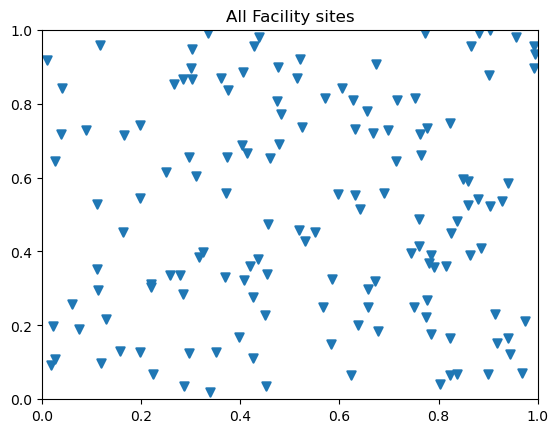

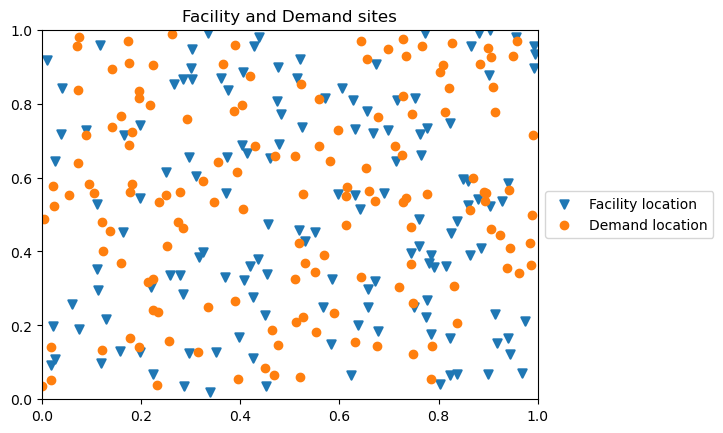


########################## STRONG FORMULATION MODEL ##########################

Set parameter Method to value 3
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 20880 rows, 20880 columns and 62208 nonzeros
Model fingerprint: 0x007389b5
Variable types: 20736 continuous, 144 integer (144 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 3e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 4021181.0000
Presolve time: 0.25s
Presolved: 20880 rows, 20880 columns, 62208 nonzeros
Variable types: 20736 continuous, 144 integer (144 binary)
Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.05s

Barrier statistics:
 Dense cols : 144
 AA' NZ  

In [24]:
import random 
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB
import numpy as np

# ########################## STRONG FORMULATION CODE ##########################
print("\n############################### STRONG FORMULATION CASE ###############################")
print("\n########################## Instances Loading ##########################\n")

# f = open('334ChessS.txt', 'r')
f = open('UFL_Instances/334ChessS.txt')
# f = open('334prac2.txt')

allData = []
fac_cost_annual = []
# content = f.read(32)
for myline in f:
    allData.append(myline)     # all data collected from txt file, each line saved as a list element
    
print("Values 1st row of allData - Name of Instances file: ", allData[0])               
print("Values 2nd row of allData: ", allData[1])               

data = allData[1]              # 2nd line of data contain total facility and demand number

def convert(string):           # each line in list are data type string, so convert them to int (function)
    li = list(string.split())
    m =[]
    for i in li:
        m.append(int(i))
    return m

facility_number = convert(data)[0]        # extract facility and demand number from 2nd line of txt data  
demand_number = convert(data)[1]          # and convert to int

facility = list(range(0, facility_number))        # facility and demand list (0 to 143)
demand = list(range(0, demand_number))

print("############### Facilities: ###############\n\n ", facility)
print("\n############### Demands: ###############\n\n ", demand)

# facility annual cost
for i in range(2, len(allData)):
    fac_cost_annual.append(convert(allData[i])[1])      # extract all facility annual cost from alldata

print("\n############### Annual Facility cost: ###############\n\n ", fac_cost_annual)

# clients connection cost
mylist = []
for i in range(2, len(allData)):                       # extract all client connection cost from each facility
    mylist.append(convert(allData[i])[2:])             # save in a np array
connection_cost_client = np.array(mylist)
# no need
print("\n############### Demands connection cost for each Facility ###############\n\n ", connection_cost_client)

print("\n############### Plots ###############\n ")    
# pick up facility location randomly
fact_x = [ random.random() for i in facility ]
fact_y = [ random.random() for i in facility ]
# print(len(fact_x), len(fact_y))

# facility location plot
plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(fact_x, fact_y, marker="v", linewidth=1.5)
plt.title('All Facility sites')

# pick up demand location randomly
dem_x = [ random.random() for i in demand ]
dem_y = [ random.random() for i in demand ]
# print(len(dem_x), len(dem_y))

# all facility and demand location plot
plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(fact_x, fact_y, label="Facility location", marker="v", linewidth=1.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(dem_x, dem_y, label="Demand location")
plt.title('Facility and Demand sites')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# all client connection cost according to facility in a dictionary 
cost = { (i,j) : connection_cost_client[i,j] for i in facility for j in demand }
#print(cost[0,0])

# create model
m = gp.Model()
# create variables, x[i,j]
x = m.addVars( facility, demand)
# create variables, y[i]
y = m.addVars( facility, vtype=GRB.BINARY )


# objective minimize transportation cost + annual implementation cost 
m.setObjective( gp.quicksum( cost[i,j] * x[i,j] for i in facility for j in demand)
                            + gp.quicksum( fac_cost_annual[i] * y[i] for i in facility), GRB.MINIMIZE)

# constraints - each demand point should be fullfilled by assigned facility 
m.addConstrs( gp.quicksum( x[i,j] for i in facility) == 1 for j in demand)
# comstraints - if no facility is bulit then there is no demand 

# strong formulation -
print("\n########################## STRONG FORMULATION MODEL ##########################\n")

m.addConstrs( x[i,j] <= y[i] for i in facility for j in demand )

m.update()

# force Gurobi to use concurrent method (primal simplex, dual simplex, barrier all at the same time!)
m.Params.Method = 3

# solve
m.optimize()


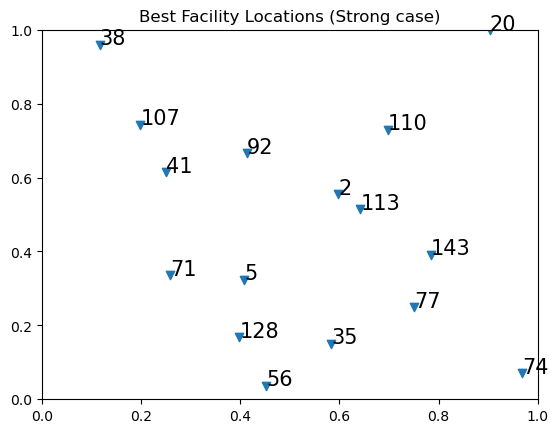

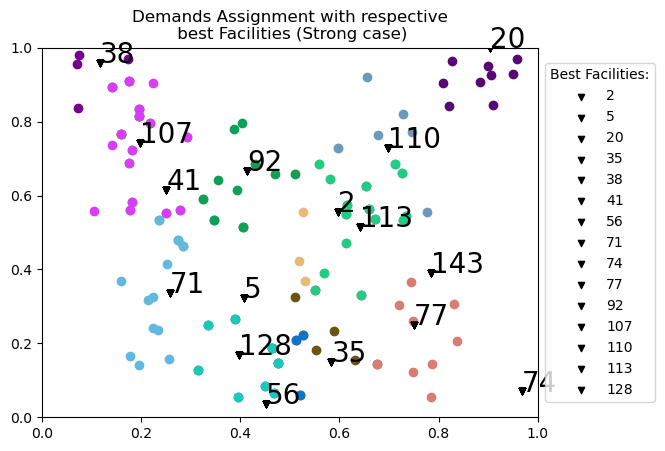

In [25]:
# Plot of facilities - strong formulation
medians = [ i for i in facility if y[i].x > 0.5 ] # best facilities
medians_x = [ fact_x[i] for i in medians ] # creation of x-axis
medians_y = [ fact_y[i] for i in medians ] # creation of y-axis

plt.title('Best Facility Locations (Strong case)')
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(medians_x, medians_y, marker="v")
for i, txt in enumerate(medians):
    plt.annotate(txt, (medians_x[i], medians_y[i]), color = "k", fontsize=15)
plt.show()

################## Assignment plot ###################
# Plot of users assign to facilities - strong formulation
# Draw the facility assignments

number_of_colors = len(medians)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Demands Assignment with respective\n best Facilities (Strong case)')

########### Assignment algorithm ##########
for ind2 in range(0, len(medians_x)-1):
    plt.scatter(medians_x, medians_y, s=20, c="k", marker="v", label=medians[ind2]) # not tested yet, add the size    
    for ind in range(0, len(dem_x)):
        if medians_x[ind2]-0.1 <= dem_x[ind] <= medians_x[ind2]+0.1:
            if medians_y[ind2]-0.2 <= dem_y[ind] <= medians_y[ind2]+0.2:
                plt.scatter(dem_x[ind], dem_y[ind], c=color[ind2])
#             elif medians_y[ind2]-0.5 <= dem_y[ind] <= medians_y[ind2]+0.5:
#                 plt.scatter(dem_x[ind], dem_y[ind], c=color[ind2])

for i, txt2 in enumerate(medians):
    plt.annotate(txt2, (medians_x[i], medians_y[i]), color = "k", fontsize=20)
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Best Facilities:") # maybe here title="Best Facilities:"
plt.show()

######### end #########

## UFL: WEAK FORMULATION MODEL


############################### WEAK FORMULATION CASE ###############################


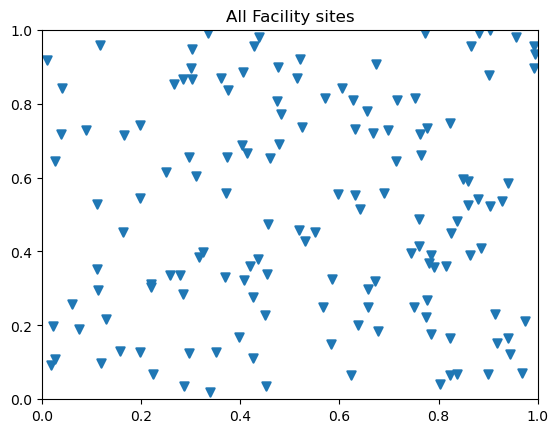

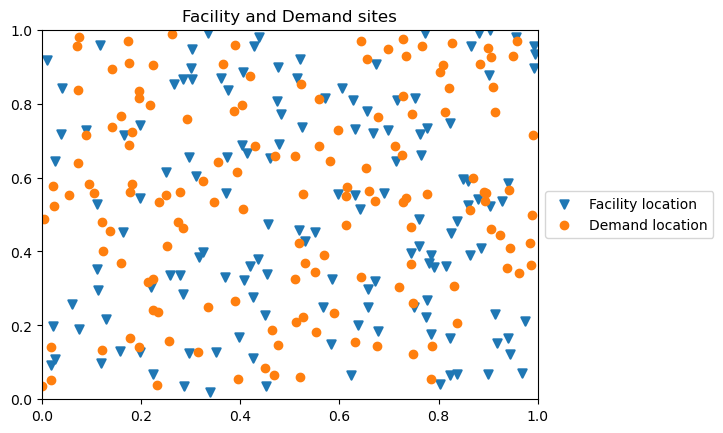


########################## WEAK FORMULATION MODEL ##########################

Set parameter Method to value 3
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 288 rows, 20880 columns and 41616 nonzeros
Model fingerprint: 0xeeb26e99
Variable types: 20736 continuous, 144 integer (144 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+00, 3e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 4021181.0000
Presolve time: 0.09s
Presolved: 288 rows, 20880 columns, 41616 nonzeros
Variable types: 20736 continuous, 144 integer (144 binary)

Root relaxation: objective 3.019000e+03, 0 iterations, 0.03 seconds (0.02 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |

In [26]:
# ########################## WEAK FORMULATION CODE ##########################
print("\n############################### WEAK FORMULATION CASE ###############################")

# facility location plot
plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(fact_x, fact_y, marker="v", linewidth=1.5)
plt.title('All Facility sites')

# all facility and demand location plot
plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(fact_x, fact_y, label="Facility location", marker="v", linewidth=1.5)
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(dem_x, dem_y, label="Demand location")
plt.title('Facility and Demand sites')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# create model
m = gp.Model()
# create variables, x[i,j] - i for facility (u from notes) and j for demand (v from notes)
x = m.addVars( facility, demand)
# create variables, y[i]
y = m.addVars( facility, vtype=GRB.BINARY )


# objective minimize transportation cost + annual implementation cost 
m.setObjective( gp.quicksum( cost[i,j] * x[i,j] for i in facility for j in demand)
                            + gp.quicksum( fac_cost_annual[i] * y[i] for i in facility), GRB.MINIMIZE)

# constraints - each demand point should be fullfilled by assigned facility 
m.addConstrs( gp.quicksum( x[i,j] for i in facility) == 1 for j in demand)
# comstraints - if no facility is bulit then there is no demand 

# weak formulation -
print("\n########################## WEAK FORMULATION MODEL ##########################\n")
# ###
# From notes of this year:
# n is the cardinality of client so the cardinality of set |D|
# m is the cardinality of set of location of facilities |S|
# notation code
# from notes to code: y_uv -> x[i,j] and x_u -> y[i] || u -> i facilities and v -> j demands
# ###

n = len(demand)
m.addConstrs(gp.quicksum(x[i,j] for j in demand) <= n*y[i] for i in facility)

# m.addConstrs( x[i,j] <= n*y[i] for i in facility for j in demand )
# m.addConstrs( sum(x[0,0].values()) <= n*y[0])

m.update()

# force Gurobi to use concurrent method (primal simplex, dual simplex, barrier all at the same time!)
m.Params.Method = 3

# solve
m.optimize()


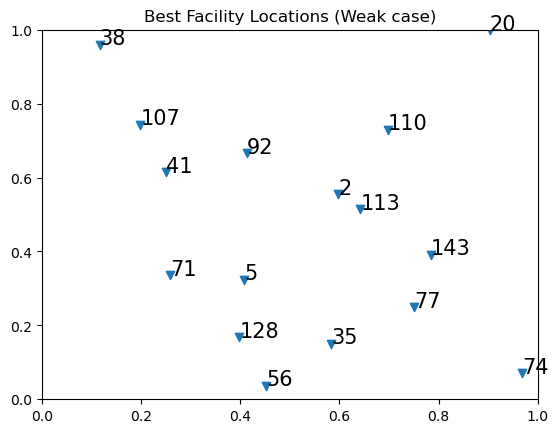

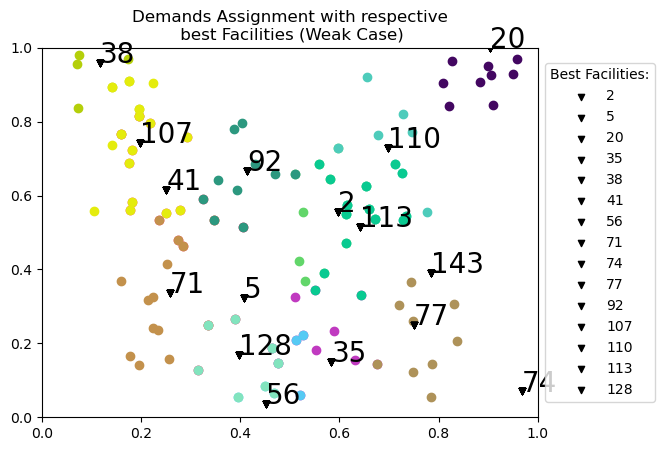

In [27]:
# Plot of facilities - weak formulation
medians = [ i for i in facility if y[i].x > 0.5 ] # best facilities
medians_x = [ fact_x[i] for i in medians ] # creation of x-axis
medians_y = [ fact_y[i] for i in medians ] # creation of y-axis

plt.title('Best Facility Locations (Weak case)')
plt.xlim(0,1)
plt.ylim(0,1)
plt.scatter(medians_x, medians_y, marker="v")
for i, txt in enumerate(medians):
    plt.annotate(txt, (medians_x[i], medians_y[i]), color = "k", fontsize=15)
plt.show()

################## Assignment plot ###################
# Plot of users assign to facilities - weak formulation
# Draw the facility assignments

number_of_colors = len(medians)

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Demands Assignment with respective\n best Facilities (Weak Case)')

########### Assignment algorithm ##########
for ind2 in range(0, len(medians_x)-1):
    plt.scatter(medians_x, medians_y, s=20, c="k", marker="v", label=medians[ind2]) # not tested yet, add the size    
    for ind in range(0, len(dem_x)):
        if medians_x[ind2]-0.1 <= dem_x[ind] <= medians_x[ind2]+0.1:
            if medians_y[ind2]-0.2 <= dem_y[ind] <= medians_y[ind2]+0.2:
                plt.scatter(dem_x[ind], dem_y[ind], c=color[ind2])
#             elif medians_y[ind2]-0.5 <= dem_y[ind] <= medians_y[ind2]+0.5:
#                 plt.scatter(dem_x[ind], dem_y[ind], c=color[ind2])

for i, txt2 in enumerate(medians):
    plt.annotate(txt2, (medians_x[i], medians_y[i]), color = "k", fontsize=20)
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Best Facilities:") # maybe here title="Best Facilities:"
plt.show()

######### end #########

# Uncapacited Facility Location - Given Instances (Example 4)

For this example, we improved the example 3 improving the assignment algorithm. For the preliminary step we extract facilities, demands, the opening cost and the connetion cost to the clients from **1234ChessS.txt** file.

We improve again removing redundancy, one script with strong and weak formulation model using same instances for both cases.

## UFL: STRONG AND WEAK FORMULATION MODEL SCRIPT


########################## Instances Loading ##########################

Values 1st row of allData - Name of Instances file:  FILE: 1234ChessS.txt

Number of Facilities:  144

Number of Demands (Users):  144

############### Facilities: ###############

  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143]

############### Demands: ###############

  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 

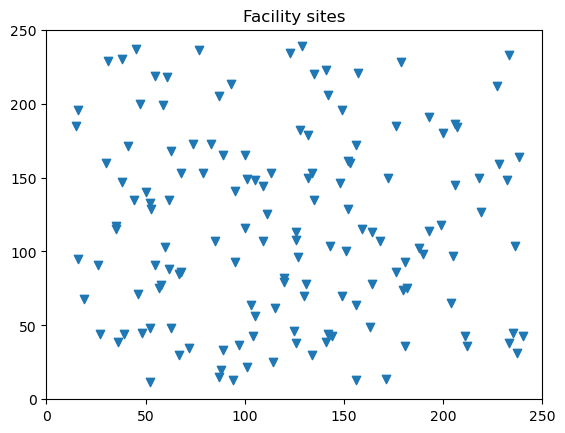

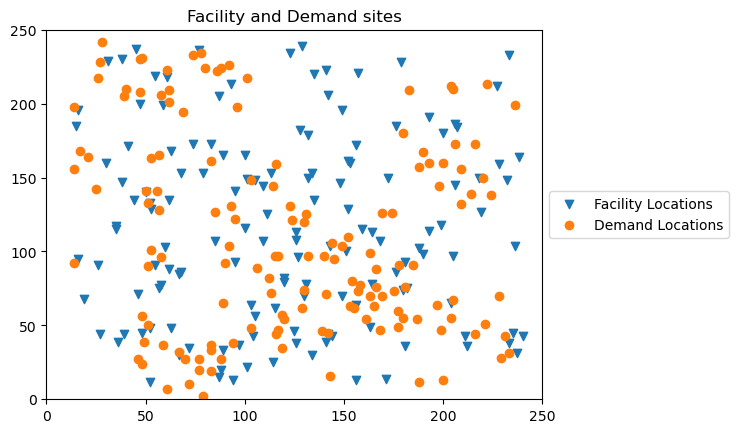

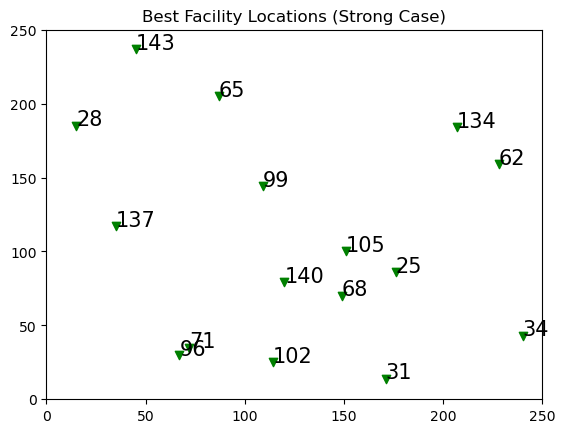

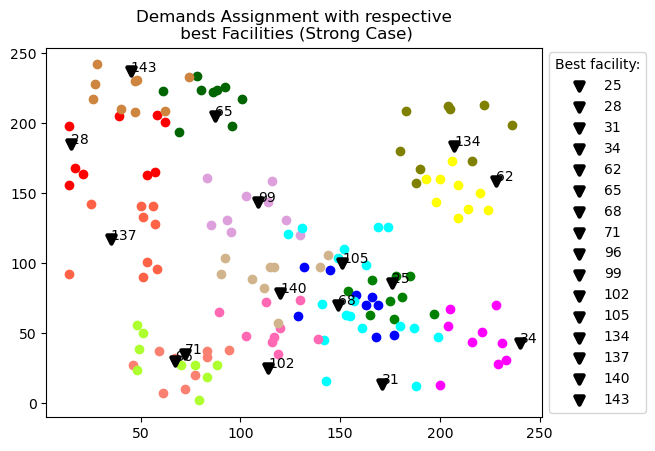


########################## WEAK FORMULATION MODEL ##########################

Set parameter Method to value 3
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i5-5200U CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 288 rows, 20880 columns and 41616 nonzeros
Model fingerprint: 0x9497ca3c
Variable types: 20736 continuous, 144 integer (144 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+00, 3e+04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 4021177.0000
Presolve time: 0.08s
Presolved: 288 rows, 20880 columns, 41616 nonzeros
Variable types: 20736 continuous, 144 integer (144 binary)

Root relaxation: objective 3.021000e+03, 0 iterations, 0.04 seconds (0.02 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |

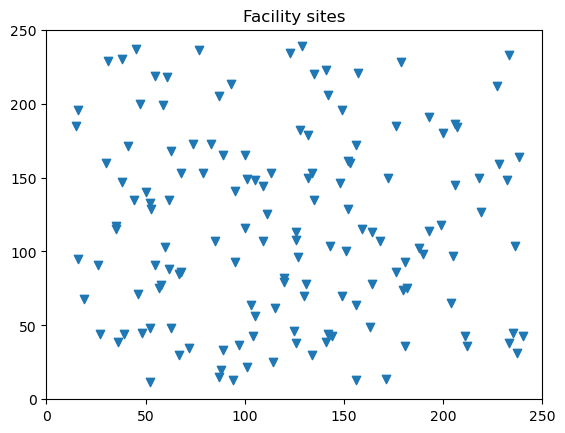

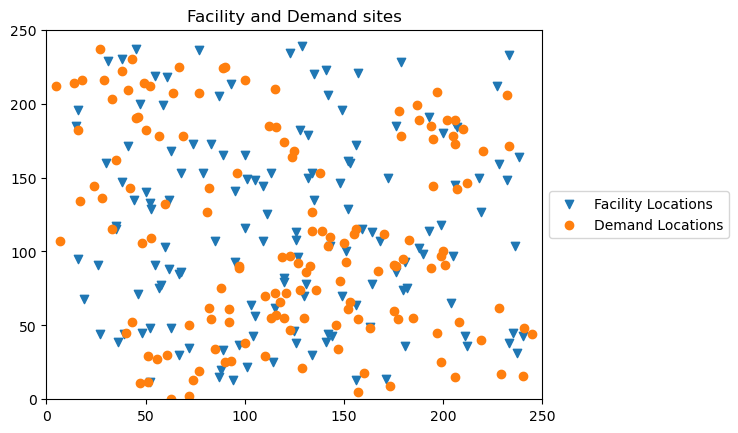

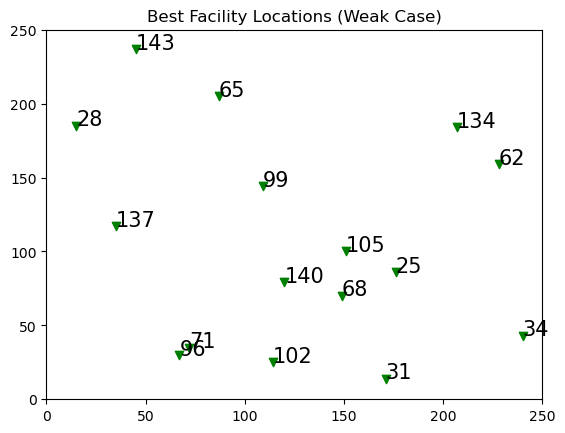

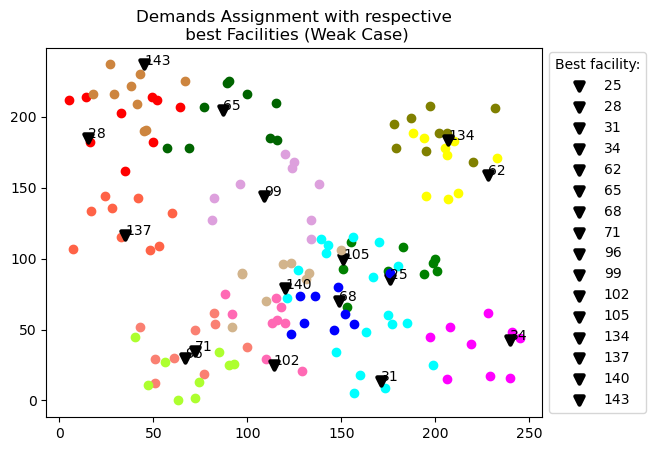

In [29]:
import random 
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB
import numpy as np

print("\n########################## Instances Loading ##########################\n")

f = open('UFL_Instances/1234ChessS.txt', 'r')
# f = open('UFL_Instances/334ChessS.txt')

allData = []
fac_cost_annual = []
# content = f.read(32)
for myline in f:
    allData.append(myline)     # all data collected from txt file, each line saved as a list element

print("Values 1st row of allData - Name of Instances file: ", allData[0]) 

data = allData[1]              # 2nd line of data contain total facility and demand number

def convert(string):           # each line in list are data type string, so convert them to int (function)
    li = list(string.split())
    m =[]
    for i in li:
        m.append(int(i))
    return m

facility_number = convert(data)[0]        # extract facility and demand number from 2nd line of txt data  
demand_number = convert(data)[1]          # and convert to int

print("Number of Facilities: ", facility_number)
print("\nNumber of Demands (Users): ", demand_number)

facility = list(range(0, facility_number))        # facility and demand list (0 to 143)
demand = list(range(0, demand_number))

print("\n############### Facilities: ###############\n\n ", facility)
print("\n############### Demands: ###############\n\n ", demand)

# facility annual cost
for i in range(2, len(allData)):
    fac_cost_annual.append(convert(allData[i])[1])      # extract all facility annual cost from alldata

print("\n############### Annual Facility cost: ###############\n\n ", fac_cost_annual)

# clients connection cost
mylist = []
for i in range(2, len(allData)):                       # extract all client connection cost from each facility
    mylist.append(convert(allData[i])[2:])             # save in a np array
connection_cost_client = np.array(mylist)
# print(connection_cost_client)

# pick up facility location randomly
fact_x = [ random.randint(10, 240) for i in facility ]
fact_y = [ random.randint(10, 240) for i in facility ]

# all client connection cost according to facility in a dictionary 
cost = { (i,j) : connection_cost_client[i,j] for i in facility for j in demand }
#print(cost[0,0])


# create model
m = gp.Model()                        # model for strong formulation
w = gp.Model()                        # model for weak formulation

# create variables, x[i,j]
x = m.addVars( facility, demand)
a = w.addVars( facility, demand)

# create variables, y[i]
y = m.addVars( facility, vtype=GRB.BINARY )
b = w.addVars( facility, vtype=GRB.BINARY )


# objective minimize transportation cost + annual implementation cost 
m.setObjective( gp.quicksum( cost[i,j] * x[i,j] for i in facility for j in demand)
                            + gp.quicksum( fac_cost_annual[i] * y[i] for i in facility), GRB.MINIMIZE)
w.setObjective( gp.quicksum( cost[i,j] * a[i,j] for i in facility for j in demand)
                            + gp.quicksum( fac_cost_annual[i] * b[i] for i in facility), GRB.MINIMIZE)

# constraints - each demand point should be fullfilled by assigned facility 
m.addConstrs( gp.quicksum( x[i,j] for i in facility) == 1 for j in demand)
w.addConstrs( gp.quicksum( a[i,j] for i in facility) == 1 for j in demand)
# comstraints - if no facility is bulit then there is no demand 

# strong formulation -
print("\n########################## STRONG FORMULATION MODEL ##########################\n")

m.addConstrs( x[i,j] <= y[i] for i in facility for j in demand )

m.update()

# force Gurobi to use concurrent method (primal simplex, dual simplex, barrier all at the same time!)
m.Params.Method = 3

# solve
m.optimize()

print("\n\n * * * * * * * * * * * * * * * * * * * * * * * * \n\n")

# functions for some use
def between(x, min, max):
    if x >= min and x <= max:
        return True
    else:
        return False

def flatten_list(regular_list):
    flat_list = [item for sublist in regular_list for item in sublist]
    return flat_list

# for clustering plot
colors = ['green', 'red', 'cyan', 'magenta', 'yellow', 'darkgreen', 'blue', 'salmon', 'greenyellow', 'plum', 'hotpink',
          'aqua', 'olive', 'tomato', 'tan', 'peru', 'coral', 'palegreen', 'silver', 'grey', 'gold']

# Mapping for strong case
medians = [ i for i in facility if y[i].x > 0.5 ]
medians_x = [ fact_x[i] for i in medians ]
medians_y = [ fact_y[i] for i in medians ]


# supporting variables
dem_x_all = []
dem_y_all = [] 

# seperating assigned demands per facility and clustering
k = len(medians)
for p in range(k):
    i = medians[p]
    assigned = [ j for j in demand if x[i,j].x > 0.5 ]
    print("\nNumber of points assigned to facility",i,"is",len(assigned))
    print("\nDemands which are associated with facility ",i,"is --\n",assigned) 
    print("\nAnd Demands are served by facility ", i, " are shown by color --- ", colors[p])
    print("\n * * * \n")
    
    if between(fact_x[i], 30, 220) == True and between(fact_y[i], 30, 220) == True:
        assigned_x = [ random.randint((fact_x[i] - 30), (fact_x[i] + 30)) for j in assigned ]
        assigned_y = [ random.randint((fact_y[i] - 30), (fact_y[i] + 30)) for j in assigned ]
    elif fact_x[i] <= 30 and between(fact_y[i], 30, 220) == True:
        assigned_x = [ random.randint((fact_x[i] - 10), (fact_x[i] + 50)) for j in assigned ]
        assigned_y = [ random.randint((fact_y[i] - 30), (fact_y[i] + 30)) for j in assigned ]
    elif fact_x[i] >= 220 and between(fact_y[i], 30, 220) == True:
        assigned_x = [ random.randint((fact_x[i] - 50), (fact_x[i] + 10)) for j in assigned ]
        assigned_y = [ random.randint((fact_y[i] - 30), (fact_y[i] + 30)) for j in assigned ]
    elif fact_y[i] <= 30 and between(fact_x[i], 30, 220) == True:
        assigned_x = [ random.randint((fact_x[i] - 30), (fact_x[i] + 30)) for j in assigned ]
        assigned_y = [ random.randint((fact_y[i] - 10), (fact_y[i] + 50)) for j in assigned ]
    elif fact_y[i] >= 220 and between(fact_x[i], 30, 220) == True:
        assigned_x = [ random.randint((fact_x[i] - 30), (fact_x[i] + 30)) for j in assigned ]
        assigned_y = [ random.randint((fact_y[i] - 50), (fact_y[i] + 10)) for j in assigned ]
    else:
        assigned_x = [ random.randint((fact_x[i] - 10), (fact_x[i] + 10)) for j in assigned ]
        assigned_y = [ random.randint((fact_y[i] - 10), (fact_y[i] + 10)) for j in assigned ]
    
        
    
    # plt.scatter(assigned_x, assigned_y)
    dem_x_all.append(assigned_x)
    dem_y_all.append(assigned_y)

#print(dem_x_all)
#print(dem_y_all)
# demands locations
dem_x = [item for sublist in dem_x_all for item in sublist]
dem_y = [item for sublist in dem_y_all for item in sublist]


# facility location plot
plt.figure()
plt.xlim(0,250)
plt.ylim(0,250)
plt.scatter(fact_x, fact_y, marker="v")
plt.title('Facility sites')

# demand location plot
plt.figure()
plt.xlim(0,250)
plt.ylim(0,250)
plt.scatter(fact_x, fact_y, marker="v", label="Facility Locations")
plt.scatter(dem_x, dem_y, label="Demand Locations")
plt.title('Facility and Demand sites')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Best Facility Locations 
plt.xlim(0,250)
plt.ylim(0,250)
plt.scatter(medians_x, medians_y, color = 'green', marker="v")
for i, txt in enumerate(medians):
    plt.annotate(txt, (medians_x[i], medians_y[i]), color = "k", fontsize=15)
plt.title('Best Facility Locations (Strong Case)')
plt.show()

# Demand Assignments with best Facilities 
for i, j , x, y, m, n in zip(dem_x_all, dem_y_all, medians_x, medians_y, medians, colors):
    plt.title('Demands Assignment with respective\n best Facilities (Strong Case)')
    plt.scatter(i, j, color = n)
    plt.scatter(x, y, marker="v", label=m, linewidth=3, c="k")
    plt.annotate(m, (x, y), color = "k", fontsize=10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Best facility:")
plt.show()


# weak formulation -
print("\n########################## WEAK FORMULATION MODEL ##########################\n")
# ###
# From notes of this year:
# n is the cardinality of client so the cardinality of set |D|
# m is the cardinality of set of location of facilities |S|
# notation code
# from notes to code: y_uv -> x[i,j] and x_u -> y[i] || u -> i facilities and v -> j demands
# ###

n = len(demand)
w.addConstrs(gp.quicksum(a[i,j] for j in demand) <= n*b[i] for i in facility)

# m.addConstrs( x[i,j] <= n*y[i] for i in facility for j in demand )
# m.addConstrs( sum(x[0,0].values()) <= n*y[0])

w.update()

# force Gurobi to use concurrent method (primal simplex, dual simplex, barrier all at the same time!)
w.Params.Method = 3

# solve
w.optimize()

print("\n\n * * * * * * * * * * * * * * * * * * * * * * * * \n\n")

# Mapping for strong case
medians = [ i for i in facility if b[i].x > 0.5 ]
medians_x = [ fact_x[i] for i in medians ]
medians_y = [ fact_y[i] for i in medians ]


# supporting variables
dem_x_all = []
dem_y_all = [] 

# seperating assigned demands per facility and clustering
k = len(medians)
for p in range(k):
    i = medians[p]
    assigned = [ j for j in demand if a[i,j].x > 0.5 ]
    print("\nNumber of points assigned to facility",i,"is",len(assigned))
    print("\nDemands which are associated with facility ",i,"is --\n",assigned) 
    print("\nAnd Demands are served by facility ", i, " are shown by color --- ", colors[p])
    print("\n * * * \n")
    
    if between(fact_x[i], 30, 220) == True and between(fact_y[i], 30, 220) == True:
        assigned_x = [ random.randint((fact_x[i] - 30), (fact_x[i] + 30)) for j in assigned ]
        assigned_y = [ random.randint((fact_y[i] - 30), (fact_y[i] + 30)) for j in assigned ]
    elif fact_x[i] <= 30 and between(fact_y[i], 30, 220) == True:
        assigned_x = [ random.randint((fact_x[i] - 10), (fact_x[i] + 50)) for j in assigned ]
        assigned_y = [ random.randint((fact_y[i] - 30), (fact_y[i] + 30)) for j in assigned ]
    elif fact_x[i] >= 220 and between(fact_y[i], 30, 220) == True:
        assigned_x = [ random.randint((fact_x[i] - 50), (fact_x[i] + 10)) for j in assigned ]
        assigned_y = [ random.randint((fact_y[i] - 30), (fact_y[i] + 30)) for j in assigned ]
    elif fact_y[i] <= 30 and between(fact_x[i], 30, 220) == True:
        assigned_x = [ random.randint((fact_x[i] - 30), (fact_x[i] + 30)) for j in assigned ]
        assigned_y = [ random.randint((fact_y[i] - 10), (fact_y[i] + 50)) for j in assigned ]
    elif fact_y[i] >= 220 and between(fact_x[i], 30, 220) == True:
        assigned_x = [ random.randint((fact_x[i] - 30), (fact_x[i] + 30)) for j in assigned ]
        assigned_y = [ random.randint((fact_y[i] - 50), (fact_y[i] + 10)) for j in assigned ]
    else:
        assigned_x = [ random.randint((fact_x[i] - 10), (fact_x[i] + 10)) for j in assigned ]
        assigned_y = [ random.randint((fact_y[i] - 10), (fact_y[i] + 10)) for j in assigned ]
    
        
    
    # plt.scatter(assigned_x, assigned_y)
    dem_x_all.append(assigned_x)
    dem_y_all.append(assigned_y)

#print(dem_x_all)
#print(dem_y_all)
# demands locations
dem_x = [item for sublist in dem_x_all for item in sublist]
dem_y = [item for sublist in dem_y_all for item in sublist]


# facility location plot
plt.figure()
plt.xlim(0,250)
plt.ylim(0,250)
plt.scatter(fact_x, fact_y, marker="v")
plt.title('Facility sites')

# demand location plot
plt.figure()
plt.xlim(0,250)
plt.ylim(0,250)
plt.scatter(fact_x, fact_y, marker="v", label="Facility Locations")
plt.scatter(dem_x, dem_y, label="Demand Locations")
plt.title('Facility and Demand sites')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Best Facility Locations 
plt.xlim(0,250)
plt.ylim(0,250)
plt.scatter(medians_x, medians_y, color = 'green', marker="v")
for i, txt in enumerate(medians):
    plt.annotate(txt, (medians_x[i], medians_y[i]), color = "k", fontsize=15)
plt.title('Best Facility Locations (Weak Case)')
plt.show()

# Demand Assignments with best Facilities 
for i, j , x, y, m, n in zip(dem_x_all, dem_y_all, medians_x, medians_y, medians, colors):
    plt.title('Demands Assignment with respective\n best Facilities (Weak Case)')
    plt.scatter(i, j, color = n)
    plt.scatter(x, y, marker="v", label=m, linewidth=3, c="k")
    plt.annotate(m, (x, y), color = "k", fontsize=10)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Best facility:")
plt.show()


# Analysis

- table in latex

# References

- latex